In [107]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
period = pd.read_csv('Period.csv')#,index_col='User_id'
period.head()

,id,start_date,end_date,User_id
0,352,5/4/15,10/4/15,252
1,353,23/3/15,27/3/15,253
2,354,6/4/15,11/4/15,254
3,355,21/3/15,24/3/15,255
4,356,26/3/15,31/3/15,256


In [119]:
#cleaning period dataframe
period.drop('id', axis = 1, inplace=True)
#period.rename(columns={'User_id':'user_id'}, inplace=True) will not work because User_id is indexColumn
period['start_date'] =pd.to_datetime(period.start_date)
period['end_date'] =pd.to_datetime(period.end_date)
# period.sort_values(by='start_date', inplace=True)
# period = period[np.isfinite(period['start_date'])]
# period = period[np.isfinite(period['end_date'])]
period.head()

KeyError: "['id'] not found in axis"

In [68]:
user = pd.read_csv('User.csv')
user.head()

,id,dob,cycle_length_initial,period_length_initial
0,252,NaN,28,6
1,253,NaN,30,5
2,254,NaN,28,6
3,255,NaN,30,4
4,256,NaN,25,6


In [81]:
user.rename(columns={'id':'User_id'}, inplace=True)
user.set_index('user_id')
user['dob'] =pd.to_datetime(user.dob, errors='coerce')
#keeping values of dob as NaT
#user.dropna(inplace=True)
user

,user_id,dob,cycle_length_initial,period_length_initial
0,252,NaT,28,6
1,253,NaT,30,5
2,254,NaT,28,6
3,255,NaT,30,4
4,256,NaT,25,6
...,...,...,...,...
6724,7051,NaT,28,4
6725,7052,NaT,32,5
6726,7053,NaT,30,4
6727,7054,NaT,28,5


In [76]:
symptom = pd.read_csv('Symptom.csv')#,index_col='user_id'
symptom.drop('id', axis = 1, inplace=True)
symptom['date'] =pd.to_datetime(symptom.date, errors='coerce')
symptom.dropna(inplace=True)
symptom.sort_values(by='date', inplace=True)
symptom.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
100,442,0,0,72,0,0,0,53,52,0,0,2015-01-09
102,492,48,0,0,0,0,0,0,0,53,49,2015-01-09
103,337,5,0,46,0,0,0,0,26,0,32,2015-01-09
104,498,64,17,45,61,63,0,35,26,41,0,2015-01-09
105,500,0,0,0,100,0,0,0,0,0,0,2015-01-09


In [85]:
#prepping data for timeseries analysis of 1133
symp_1133=symptom[symptom.user_id==1133]
# peri_1133=period[period.User_id==1133]
# peri_1133
# symp_1133

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
750,1133,0,98,80,100,0,70,100,56,97,100,2015-02-11
1180,1133,73,71,69,81,2,55,57,76,28,88,2015-02-12
767,1133,0,99,98,100,59,0,0,95,0,46,2015-03-11
1179,1133,0,68,71,71,0,0,0,0,0,73,2015-03-12
1214,1133,0,39,0,39,0,0,0,0,0,0,2015-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...
13330,1133,0,0,86,26,88,0,0,0,0,0,2019-07-02
13445,1133,0,0,0,0,0,0,0,0,0,0,2019-07-03
13180,1133,0,0,86,81,0,0,0,0,0,0,2019-08-01
13187,1133,0,92,0,97,0,0,0,0,0,0,2019-09-01


AttributeError: 'PolyCollection' object has no property 'lpha'

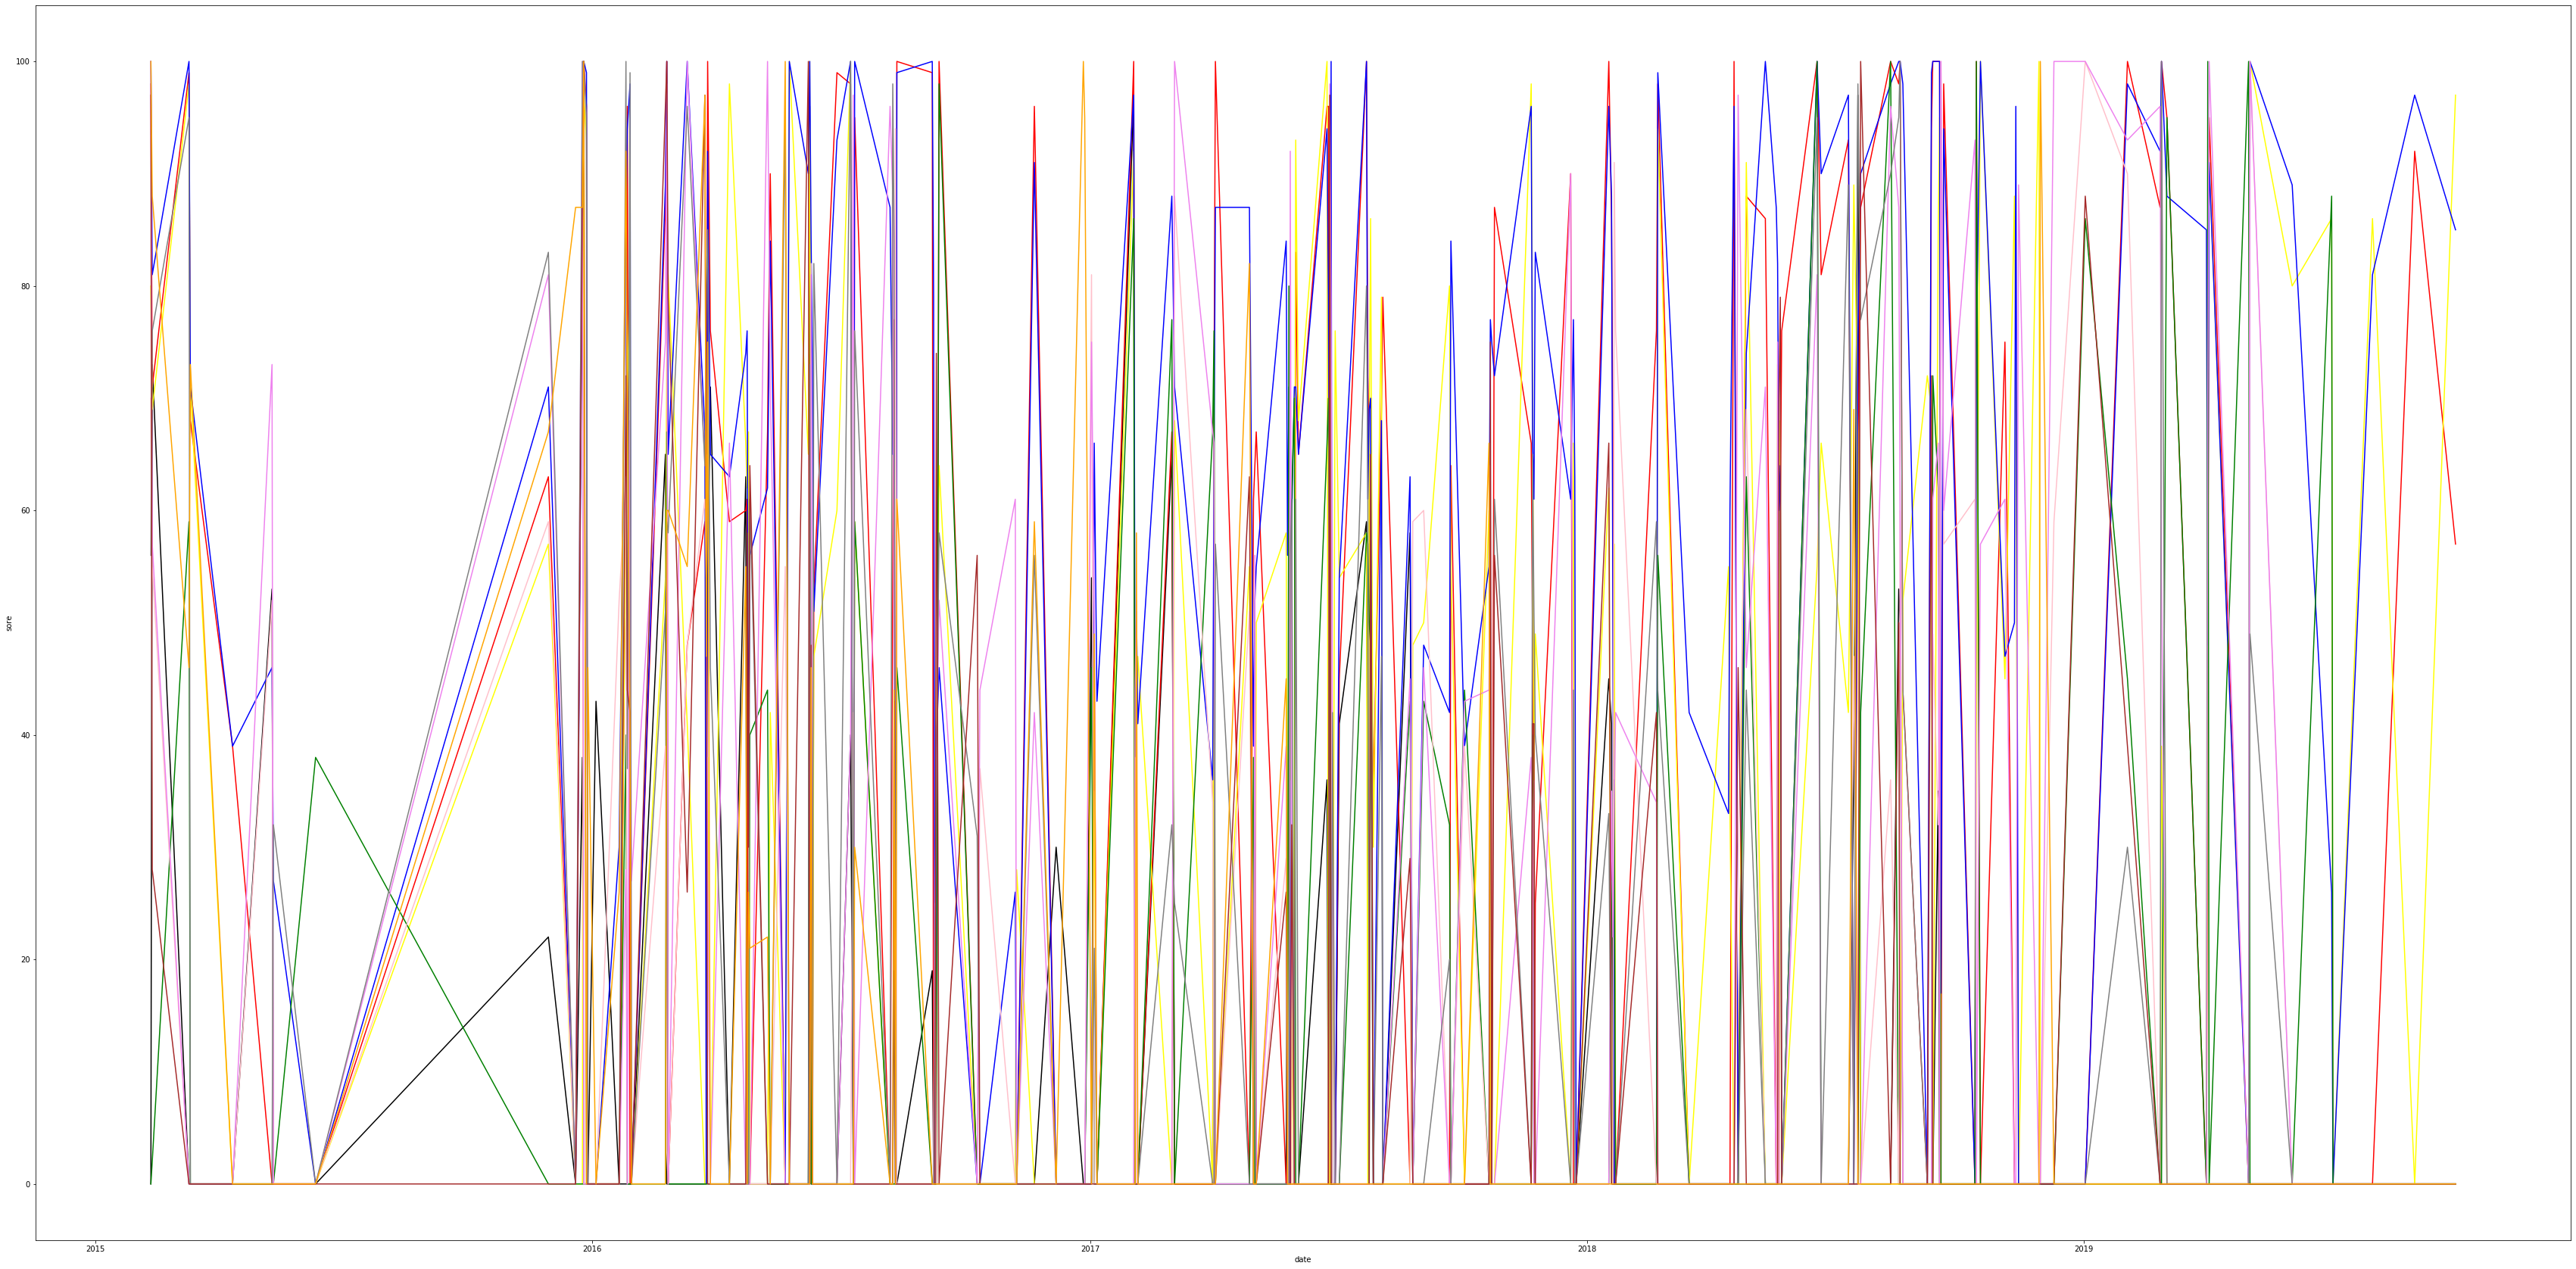

In [97]:
plt.figure(figsize=(60,30))
sns.lineplot(x="date", y="acne", data=symp_1133, color="BLACK")
sns.lineplot(x="date", y="backache", data=symp_1133, color="RED")
sns.lineplot(x="date", y="bloating", data=symp_1133, color="YELLOW")
sns.lineplot(x="date", y="cramp", data=symp_1133, color="BLUE")
sns.lineplot(x="date", y="diarrhea", data=symp_1133, color="GREEN")
sns.lineplot(x="date", y="dizzy", data=symp_1133, color="PINK")
sns.lineplot(x="date", y="headache", data=symp_1133, color="VIOLET")
sns.lineplot(x="date", y="mood", data=symp_1133, color="GREY")
sns.lineplot(x="date", y="nausea", data=symp_1133, color="BROWN")
sns.lineplot(x="date", y="sore", data=symp_1133, color="ORANGE")


In [102]:
peri_1133.head()

,start_date,end_date,User_id
1473,2015-02-11,2015-09-11,1133
1472,2015-03-10,2015-11-10,1133
2266,2015-11-30,2015-07-12,1133
2936,2015-12-26,2016-02-01,1133
4006,2016-01-26,2016-02-02,1133


In [101]:
index = pd.MultiIndex.from_product([[1133],pd.date_range(start = peri_1133.start_date.min(), end = peri_1133.end_date.max())], names=['User_id', 'date'])
new_df = pd.DataFrame(index = index, data = {'counts':0})

dates_list = new_df.index.get_level_values(1)
items_list = new_df.index.get_level_values(0)
for row in peri_1133.itertuples():
  new_df.counts[(items_list == row.User_id) & (dates_list>=row.start_date) & (dates_list<= row.end_date)] += 1

new_df.head()

counts
User_id date              
1133    2015-02-11       1
        2015-02-12       1
        2015-02-13       1
        2015-02-14       1
        2015-02-15       1

/home/avani/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


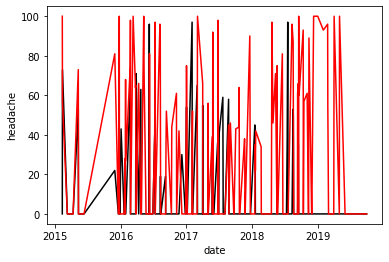

In [89]:
sns.lineplot(x="date", y="acne", data=symp_1133, color="BLACK")
sns.lineplot(x="date", y="headache", data=symp_1133, color="RED")
sns.lineplot(x="date", y="headache", data=symp_1133, color="RED")
sns.lineplot(x="date", y="headache", data=symp_1133, color="RED")
sns.lineplot(x="date", y="headache", data=symp_1133, color="RED")
sns.lineplot(x="date", y="headache", data=symp_1133, color="RED")
sns.lineplot(x="date", y="headache", data=symp_1133, color="RED")

